In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("ObesityDataSet.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [4]:
df.shape

(2111, 17)

In [5]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


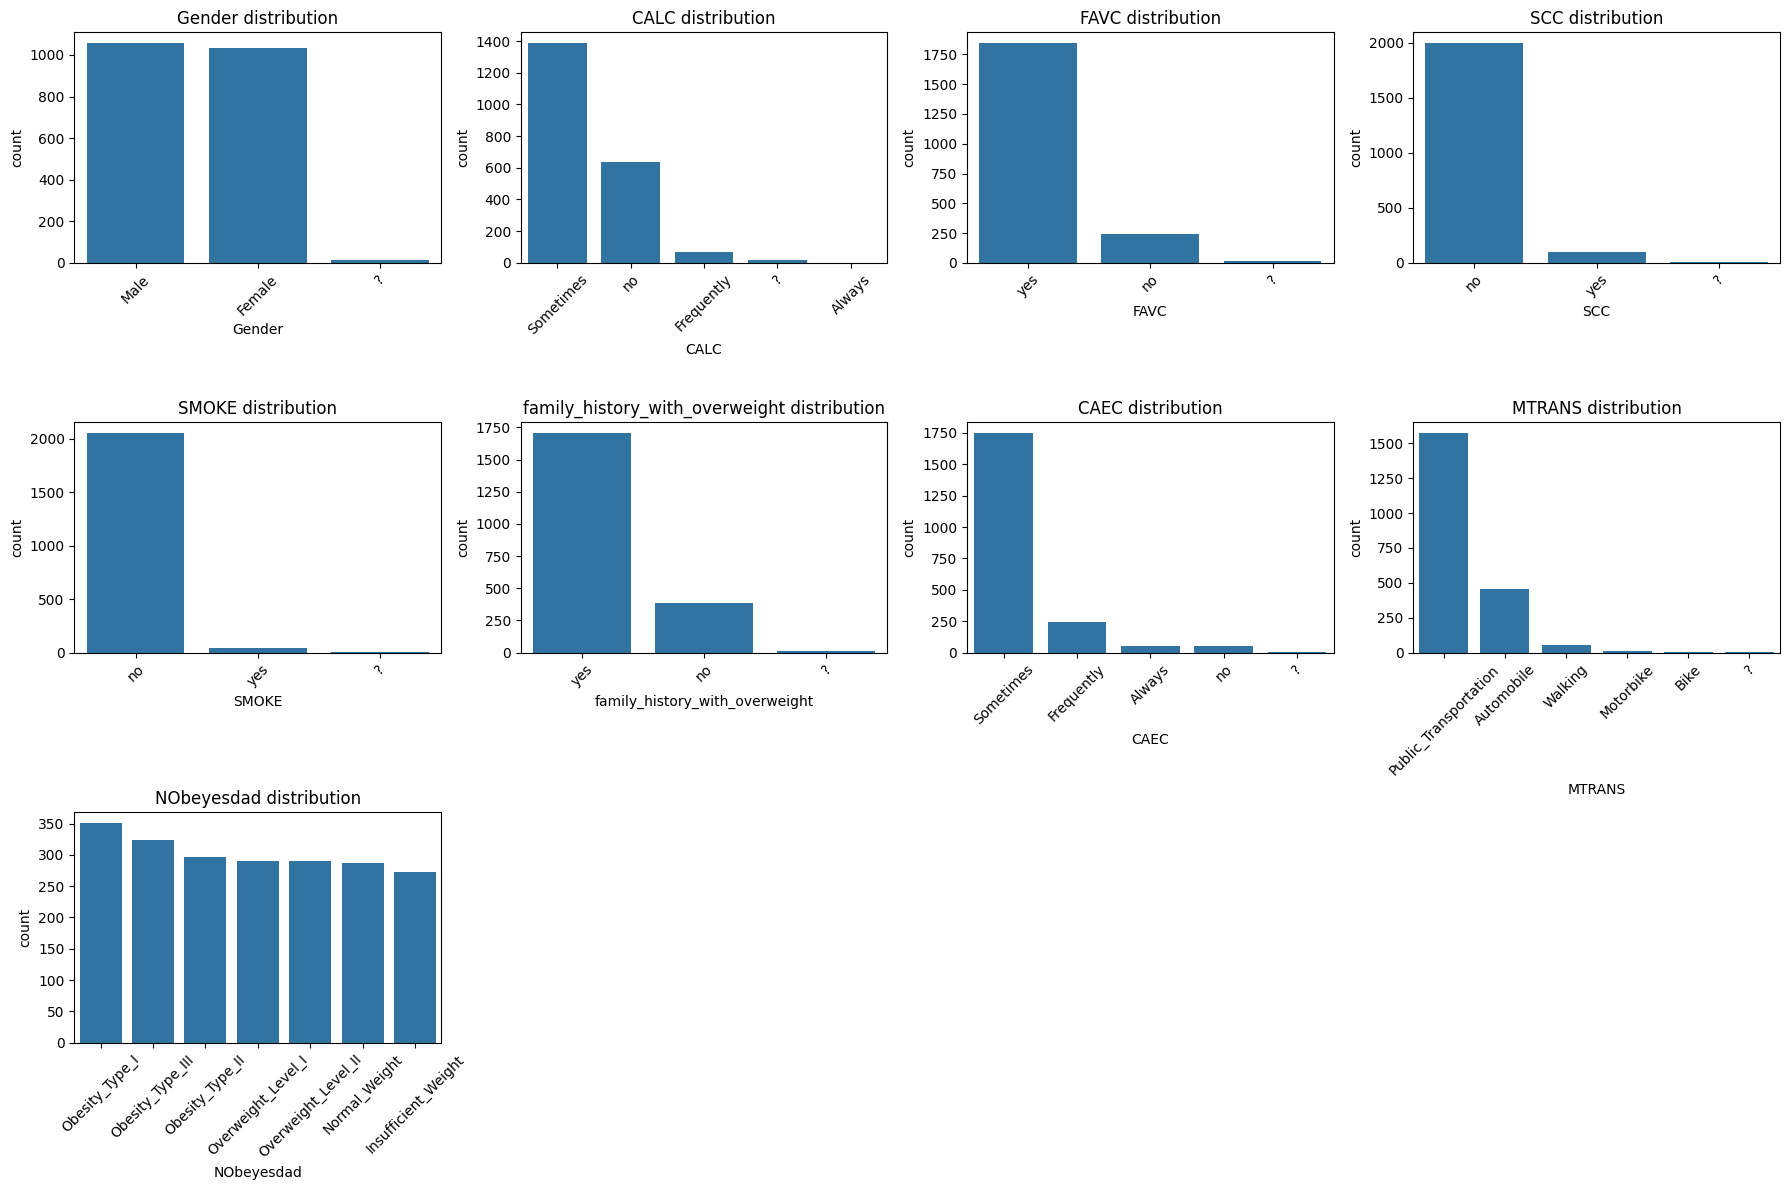

In [6]:
# Hanya plot kolom yang kategorikal dengan jumlah kategori <= 20
cat_cols = [c for c in df.select_dtypes('object').columns
            if df[c].nunique() <= 20]

n = len(cat_cols)
n_cols = 4
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=df, x=col, ax=ax,
                  order=df[col].value_counts().index)
    ax.set_title(f'{col} distribution')
    ax.tick_params(axis='x', rotation=45)

# Hapus sumbu kosong
for ax in axes.flatten()[n:]:
    ax.remove()

plt.tight_layout()
plt.show()

In [7]:
df.isnull().sum()

Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

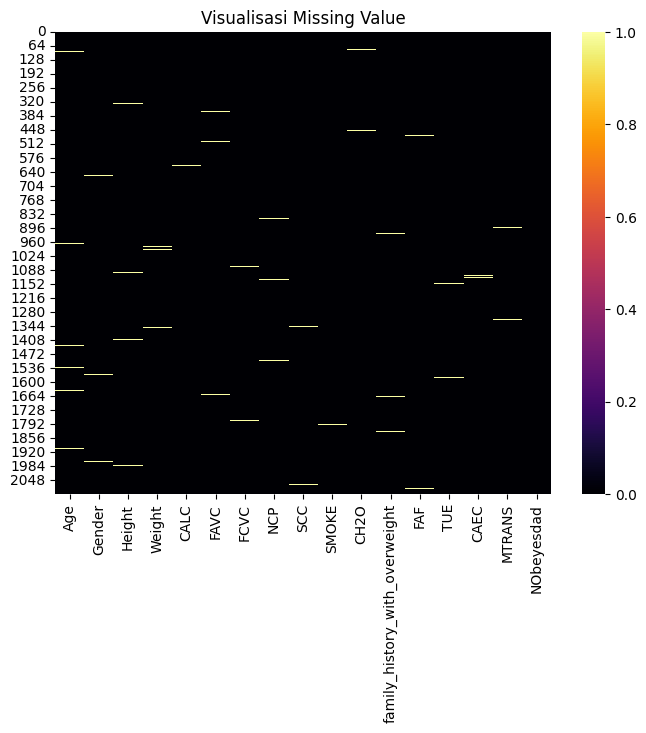

In [8]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='inferno')
plt.title('Visualisasi Missing Value')
plt.show()

In [9]:
print(df.duplicated().sum())
df[df.duplicated(keep=False)]

18


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
97,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
98,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
145,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
174,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
179,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
184,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
282,18,Female,1.62,55,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight
295,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight
309,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight
460,18,Female,1.62,55,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight


In [10]:
for col in df.columns:
    print(f'{col}')
    print(f'Jumlah nilai yang unik: {df[col].nunique()}')
    print(f'Nilai yang paling sering muncul (modus): {df[col].mode().values[0]}')
    print(f'{df[col].unique()}\n')

Age
Jumlah nilai yang unik: 1394
Nilai yang paling sering muncul (modus): 18
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Gender
Jumlah nilai yang unik: 3
Nilai yang paling sering muncul (modus): Male
['Female' 'Male' '?' nan]

Height
Jumlah nilai yang unik: 1562
Nilai yang paling sering muncul (modus): 1.7
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Weight
Jumlah nilai yang unik: 1518
Nilai yang paling sering muncul (modus): 80
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

CALC
Jumlah nilai yang unik: 5
Nilai yang paling sering muncul (modus): Sometimes
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

FAVC
Jumlah nilai yang unik: 3
Nilai yang paling sering muncul (modus): yes
['no' 'yes' '?' nan]

FCVC
Jumlah nilai yang unik: 808
Nilai yang paling sering muncul (modus): 3
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2

In [11]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2103 non-null   object 
 7   NCP                             2099 non-null   object 
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2105 non-null   object 
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF                             21

In [12]:
# Statistik deskriptif untuk kolom numerik
print(df[['Age', 'Height', 'Weight']].describe())

               Age       Height       Weight
count  2089.000000  2089.000000  2092.000000
mean     24.717928     1.706623    88.608184
std       8.391323     0.117700    36.154617
min      14.000000     1.450000    39.000000
25%      19.955257     1.630000    66.000000
50%      22.814657     1.701284    83.000000
75%      26.000000     1.770000   108.055736
max     106.441252     2.853986   441.131078


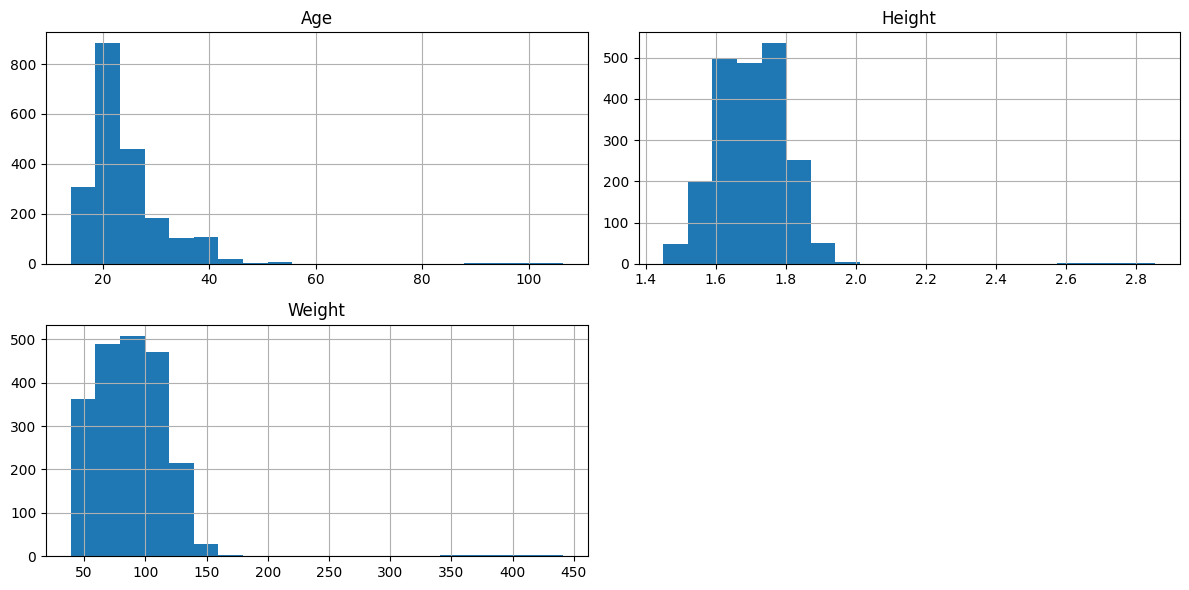

In [13]:
# Visualisasi distribusi fitur numerik
df[['Age', 'Height', 'Weight']].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

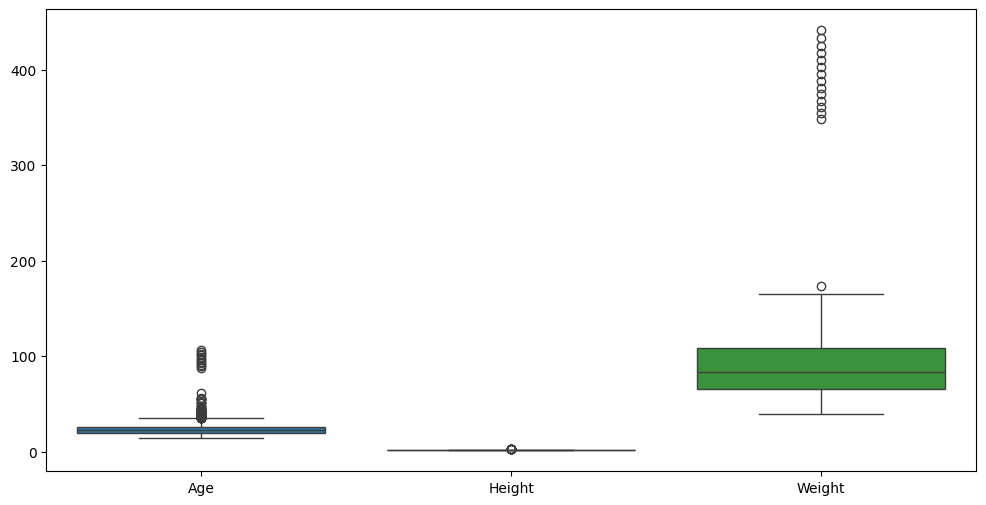

In [14]:
# Visualisasi boxplot untuk fitur numerik untuk deteksi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Height', 'Weight']])
plt.show()

In [15]:
# Cek distribusi kelas pada kolom target
print("\nDistribusi Kelas pada Kolom Target 'NObeyesdad':")
print(df['NObeyesdad'].value_counts())


Distribusi Kelas pada Kolom Target 'NObeyesdad':
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


# Pre-processing

In [17]:
df = df.drop_duplicates()

In [18]:
print(df.duplicated().sum())

0


In [19]:
# 1.c  Imputasi:   median utk numerik, modus utk kategori
num_imputer  = SimpleImputer(strategy='median')
cat_imputer  = SimpleImputer(strategy='most_frequent')

In [20]:
num_cols = ['Age', 'Height', 'Weight']
# 1.d  Deteksi outlier sederhana (IQR); tandai lalu winsorize
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr    = q3 - q1
    lower  = q1 - 1.5*iqr
    upper  = q3 + 1.5*iqr
    df[col] = np.clip(df[col], lower, upper)